<a href="https://colab.research.google.com/github/DevP-ai/Microsoft-Ignite-AI-Automation-Challenge/blob/main/Microsoft_DecisionTreeAndEnsembleAlgorithm_Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#Load dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv

--2022-11-04 06:02:14--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.006s  

2022-11-04 06:02:14 (7.72 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



In [ ]:
bike_data=pd.read_csv("daily-bike-share.csv")

In [ ]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [ ]:
bike_data.sample() # yr=0 means 2011 and yr=1 means 2012

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
242,243,8/31/2011,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688


**The data consists of the following columns:**

**instant: A unique row identifier**

**dteday: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.**

**season: A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)**

**yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)**

**mnth: The calendar month in which the observation was made (1:January ... 12:December)**

**holiday: A binary value indicating whether or not the observation was made on a public holiday)**

**weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)**

**workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)**

**weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)**

**temp: The temperature in celsius (normalized)**

**atemp: The apparent ("feels-like") temperature in celsius (normalized)**

**hum: The humidity level (normalized)**

**windspeed: The windspeed (normalized)**

**rentals: The number of bicycle rentals recorded.**

## **Feature Engineering**

*Rentals is the label for this dataset.*

## Derive a new feature from dteday

In [ ]:
bike_data['day']=pd.DatetimeIndex(bike_data['dteday']).day

In [ ]:
bike_data.head(1)  # As we can see The Day column derive from dteday at last position

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1


## Now Analysing of the numeric data by examining a few key descriptive 





In [ ]:
bike_data[['temp','atemp','hum','windspeed','rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


 **The Statistical reveal some Information**

1.The mean

2.Standard Deviation

3.Min and Max Values

4.Quartile Value(the threshold values for 25%,50% which is also the median and 75%  of the data)

We can see that mean of daily bike rent is around 848 but standard deviation is (686.622) comparatively larger than mean.It's indicates that Rentals data are a lot of variance in the number of rentals per day.

Might get a clear idea of the distributon of rental values by visualising

In [ ]:
import matplotlib.pyplot as plt

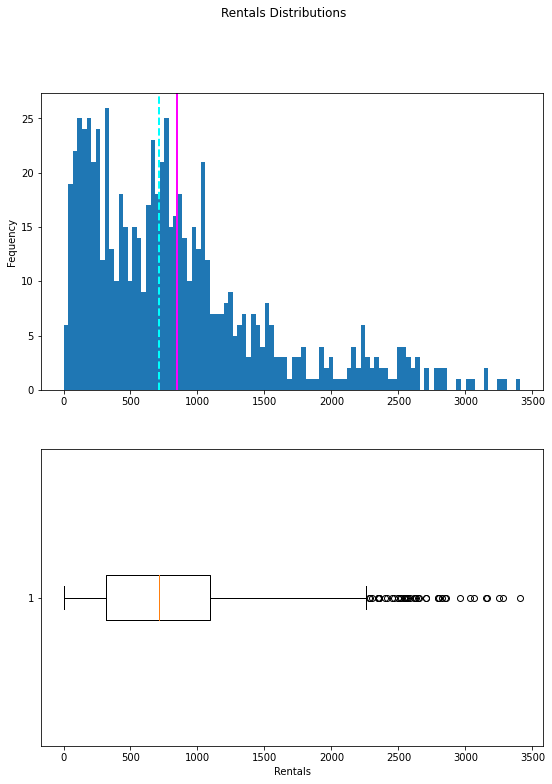

In [ ]:
#Create a figure 2 subplots (2 rows,1column)
fig,ax=plt.subplots(2,1,figsize=(9,12))
# %matplotlib inline
#plot the histrogram of rentals
ax[0].hist(bike_data['rentals'],bins=100)
ax[0].set_ylabel("Fequency")

#add lines for the mean,median in histrogram of Rentals data

ax[0].axvline(bike_data['rentals'].mean(),color='magenta',
              linestyle='solid',linewidth=2)

ax[0].axvline(bike_data['rentals'].median(),color='cyan',
              linestyle='dashed',linewidth=2)

#Plot Boxplot for rentals data

ax[1].boxplot(bike_data['rentals'],vert=False)
ax[1].set_xlabel('Rentals')

fig.suptitle("Rentals Distributions")

fig.show()

The plots shows that the number of daily rentals range from 0 to just over 3400.
However,the mean and median number of daily rentals is closer to the low end of that range,with most of the data between 0 and around 2200 rentals.

The few values above this are shown in the box plot as small circles,indicating that they are outliers-in other words,usually high or low values beyond the typical range of most of the data.



We can do the same kind of visual exploration of the numeric features.

Let's create a histrogram for each of these.

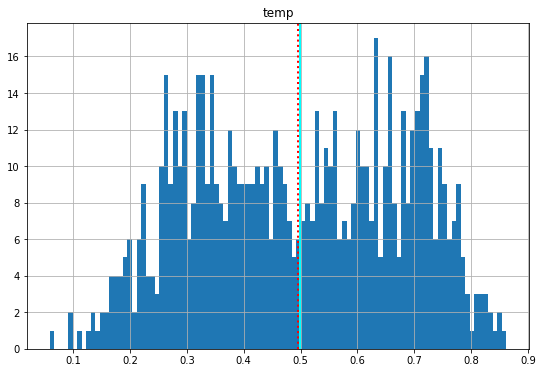

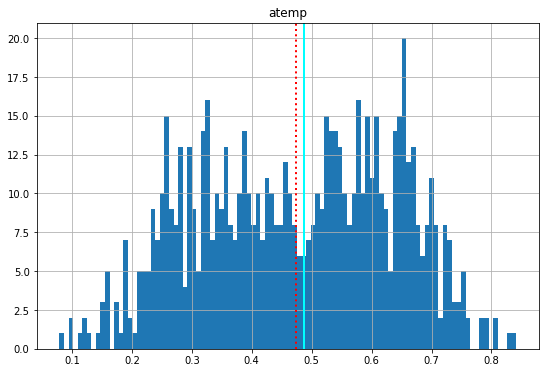

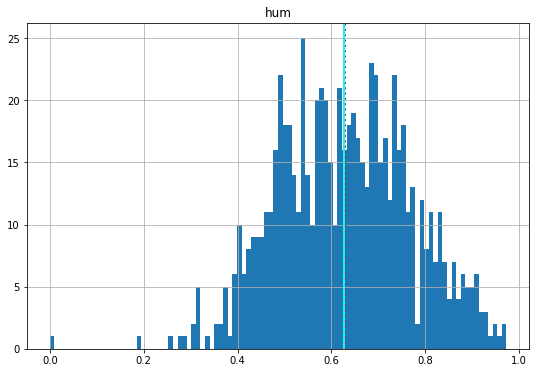

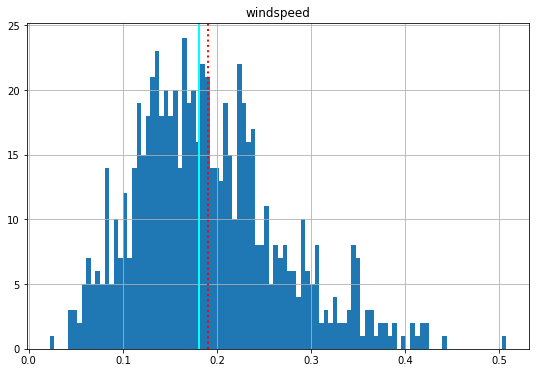

In [ ]:
#plot  histrogram for each numeric feature
numeric_feature=['temp','atemp','hum','windspeed']
for col in numeric_feature:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=bike_data[col]
  feature.hist(bins=100,ax=ax)
  ax.axvline(feature.mean(),color="red",linestyle='dotted',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='solid',linewidth=2)
  ax.set_title(col)
plt.show()

The numeric features seems to be more normally distributed,with mean and median nearer the middle of the range of values,coinciding with where the most commonly occurring values.


**NOTE**:The distributions are not truly normal in the statistical sense,which would result in a smooth,symmetric "bell-curve" histrogram with the mean and mode (the most common values) in the center,but they do generally indicate that most of the observations have a value somewhere near the middle. 




We have explored the distribution of the numeric values in the dataset,but what about the categorical features? These aren't continous numbers on a scale,so we can't use histrogram,but we can plot a bar chart showing the count of each discrete value for each category. 

In [ ]:
bike_data['weekday'].value_counts().sort_index()

0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: weekday, dtype: int64

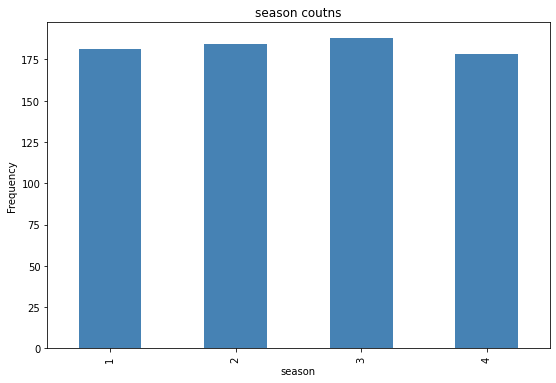

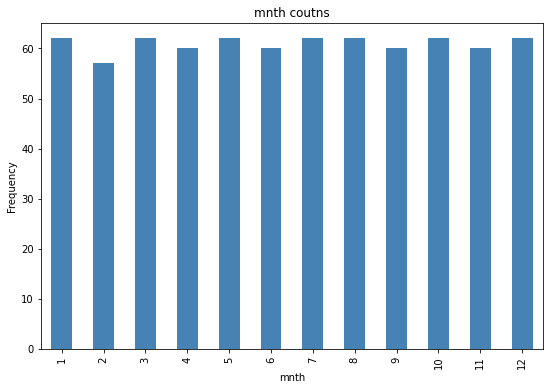

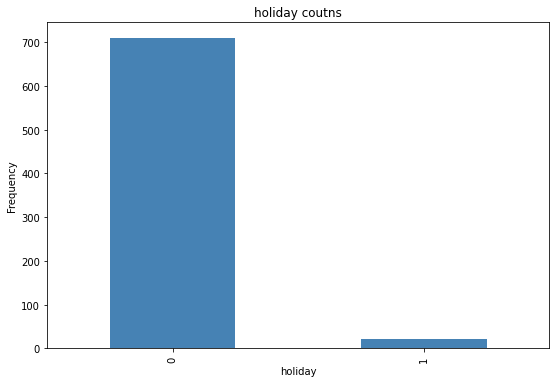

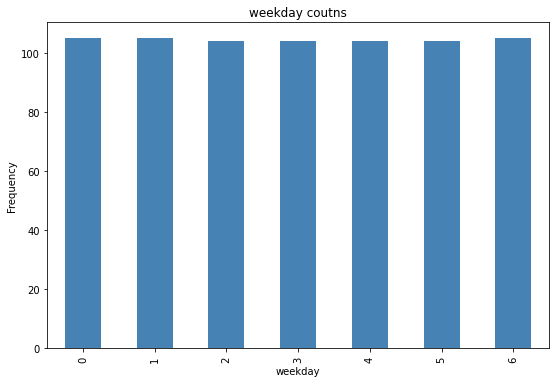

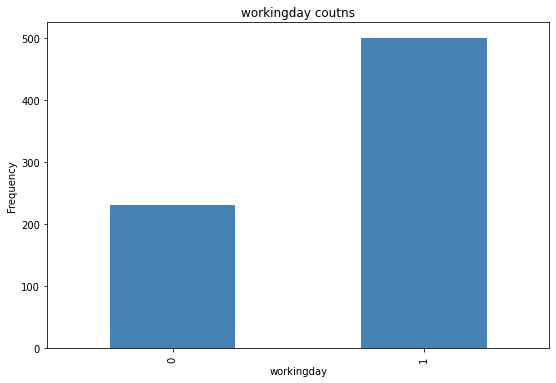

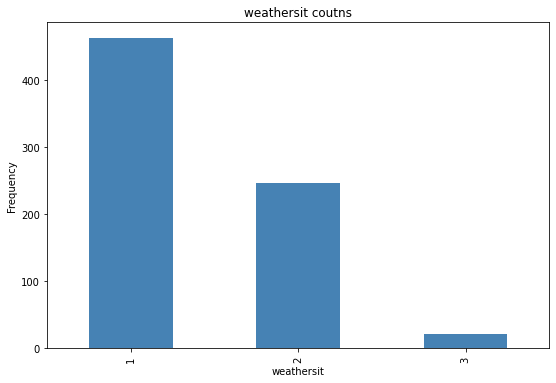

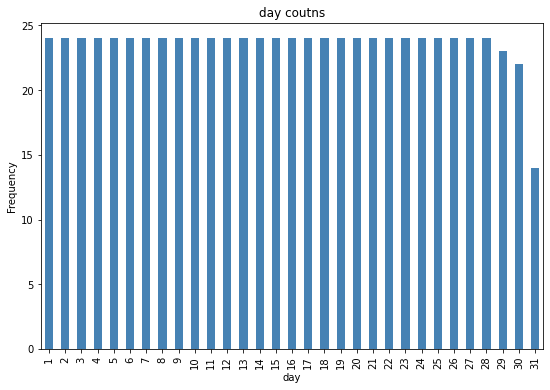

In [ ]:
import numpy as np

categorical_feature=['season','mnth','holiday','weekday','workingday','weathersit','day']

for col in categorical_feature:
  counts=bike_data[col].value_counts().sort_index()
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  counts.plot.bar(ax=ax,color='steelblue')
  ax.set_title(col+ ' coutns')
  ax.set_ylabel("Frequency")
  ax.set_xlabel(col)

plt.show()

Many of the categorical features show a more or less uniform distribution(meaning there's roughly the same number of rows for each category).Exception to this include.

**1.holiday:** There are many fewer days that are holidays than days that aren't.
**2.workingday:**There are more working days than non-working days.

**3.weathersit:**Most days are category 1(clear),with category 2(mist and cloud) the next most common.There are comparatively few category 3 (light rain or snow ) days,and no category 4 (heavy rain,or fog) days at all.

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the rentals label we want to be able to predict.

For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship.

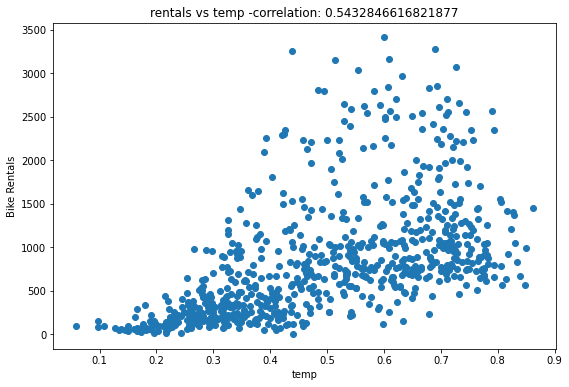

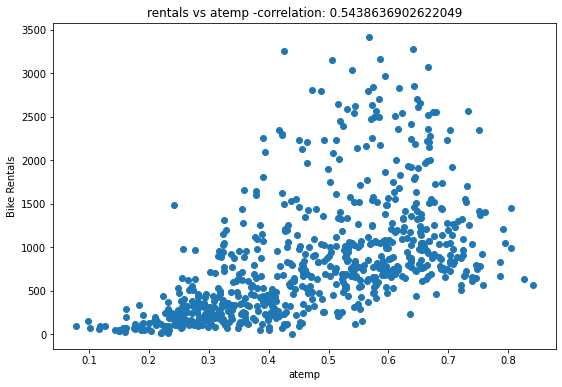

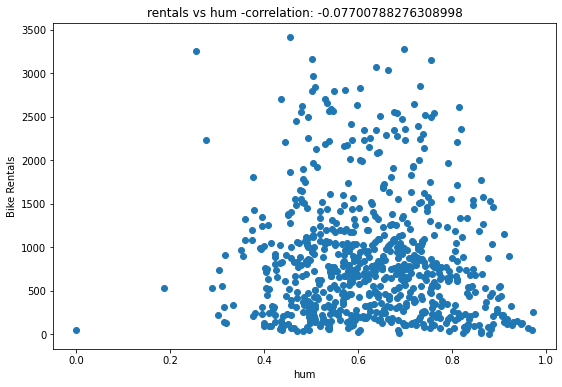

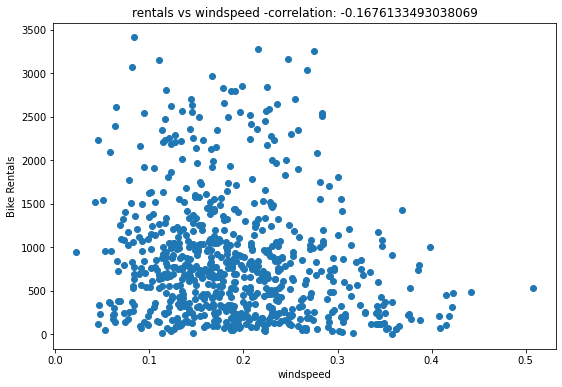

In [ ]:
for col in numeric_feature:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=bike_data[col]
  label=bike_data['rentals']
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Bike Rentals') 
  ax.set_title("rentals vs "+ col +" -correlation: "+str(correlation))
plt.show()

The results aren't conclusive, but if you look closely at the scatter plots for temp and atemp, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of rental counts for each category.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

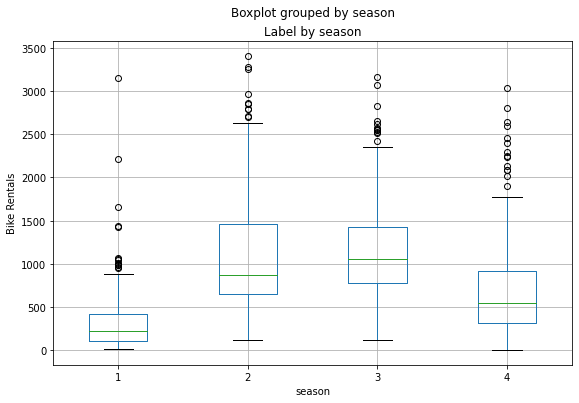

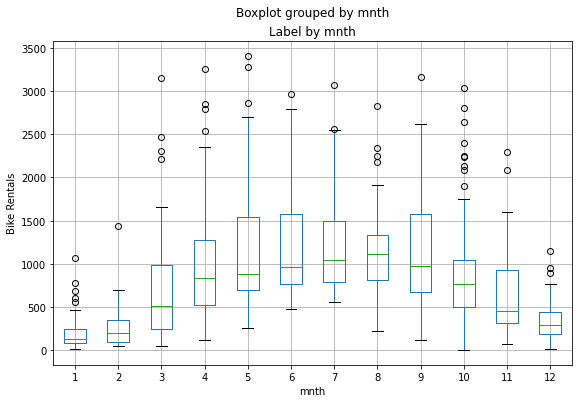

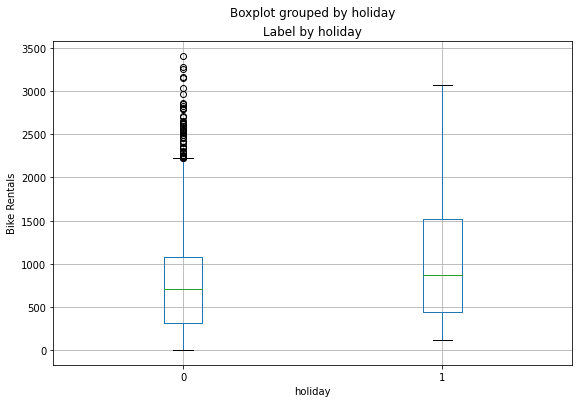

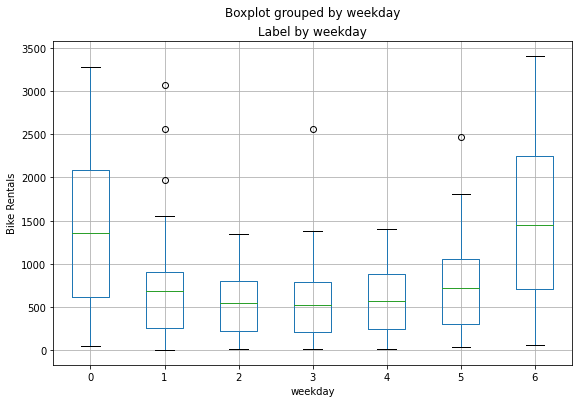

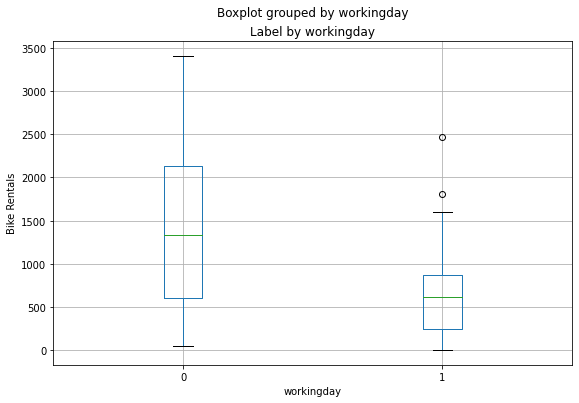

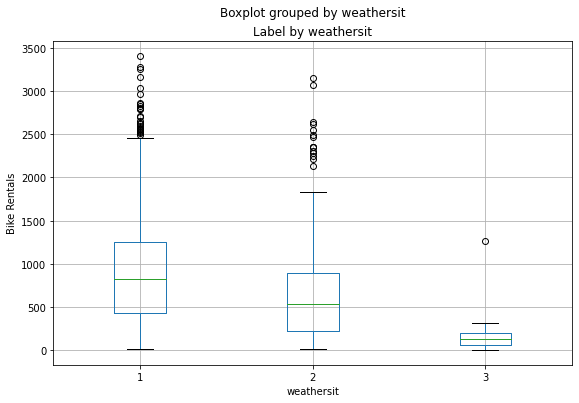

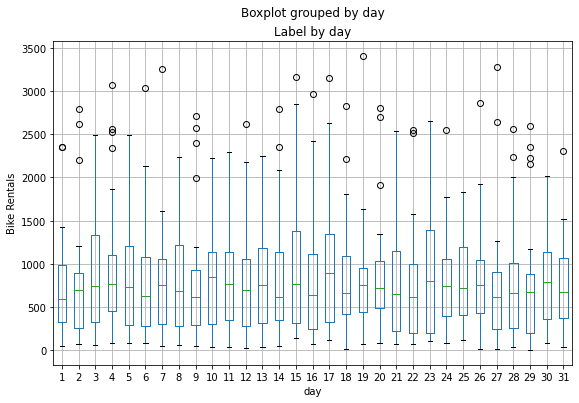

In [ ]:
for col in categorical_feature:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  bike_data.boxplot(column='rentals',by=col,ax=ax)
  ax.set_title("Label by "+col)
  ax.set_ylabel("Bike Rentals")
plt.show()

The plots show some variance in the relationship between some category values and rentals. For example, there's a clear difference in the distribution of rentals on weekends (weekday 0 or 6) and those during the working week (weekday 1 to 5). Similarly, there are notable differences for holiday and workingday categories. There's a noticeable trend that shows different rental distributions in spring and summer months compared to winter and fall months. The weathersit category also seems to make a difference in rental distribution. The day feature we created for the day of the month shows little variation, indicating that it's probably not predictive of the number of rentals.

## **Train a Regression Model**

In [ ]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

In [ ]:
print("Feature: ",X[:10],"\n Labels: ",y[:10],sep="\n")

Feature: 
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

In [ ]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

print("Training set:%d rows\nTest set: %d rows "%(X_train.shape[0],X_test.shape[0]))

Training set:511 rows
Test set: 220 rows 


Now we have the following four datasets:


**X_train:** The feature values we'll use to train the model


**y_train:** The corresponding labels we'll use to train the model


**X_test:** The feature values we'll use to validate the model


**y_test:** The corresponding labels we'll use to validate the model

In [ ]:
from sklearn.linear_model import LinearRegression 

model=LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


**Evaluate the Trained Model**


Now that we've trained the model, we can use it to predict rental counts for the features we held back in our validation dataset. Then we can compare these predictions to the actual label values to evaluate how well (or not!) the model is working.

In [ ]:
import numpy as np

prediction=model.predict(X_test)
np.set_printoptions(suppress=True)
print("Predicted labels: ",np.round(prediction)[:10])
print("Actual labels: ",y_test[:10])

Predicted labels:  [ 399. 1279. 1325. 1481.  182.  609. 1890. 1774.  193.  325.]
Actual labels:  [ 618  752 1424 1338  120  118 3410 2006  143  190]


Comparing each prediction with its corresponding "ground truth" actual value isn't a very efficient way to determine how well the model is predicting. Let's see if we can get a better indication by visualizing a scatter plot that compares the predictions to the actual labels. We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

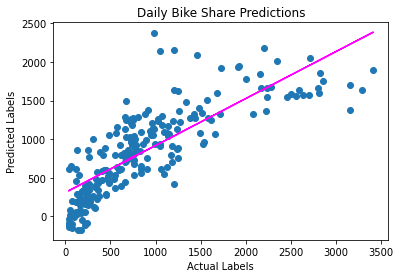

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline 

plt.scatter(y_test,prediction)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Daily Bike Share Predictions")

#over the regression line

z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)

plt.plot(y_test,p(y_test),color="magenta")
plt.show()

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown.


You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:


**Mean Square Error (MSE):** The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model.


**Root Mean Square Error (RMSE):** The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!).


**Coefficient of Determination (usually known as R-squared or R2):** A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.



In [ ]:
from sklearn.metrics import mean_squared_error,r2_score 

mse=mean_squared_error(y_test,prediction) 
print("MSE: ",mse)

rmse=np.sqrt(mse)
print("RMSE: ",rmse)

r2=r2_score(y_test,prediction) 
print("R2: ",r2)

MSE:  201532.39165024695
RMSE:  448.92359221837177
R2:  0.6420085846019637


# **Try a Decison Tree Algorithm**

As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a branch in a decision tree based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

It's easiest to see how this works with an example. Let's train a Decision Tree regression model using the bike rental data. After training the model, the code below will print the model definition and a text representation of the tree it uses to predict label values.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [ ]:
DTR=DecisionTreeRegressor().fit(X_train,y_train)
print(DTR)

DecisionTreeRegressor()


In [ ]:
tree=export_text(DTR)
print(tree)

|--- feature_6 <= 0.42
|   |--- feature_7 <= 0.31
|   |   |--- feature_7 <= 0.25
|   |   |   |--- feature_1 <= 11.00
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_9 <= 0.32
|   |   |   |   |   |   |--- feature_8 <= 0.60
|   |   |   |   |   |   |   |--- feature_7 <= 0.12
|   |   |   |   |   |   |   |   |--- value: [93.00]
|   |   |   |   |   |   |   |--- feature_7 >  0.12
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.19
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- value: [284.00]
|   |   |   |   |   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |   |   |   |   |--- value: [333.00]
|   |   |   |   |   |   |   |   |--- feature_7 >  0.19
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 0.53
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [217.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  1.50


In [ ]:
pred=DTR.predict(X_test)
mse=mean_squared_error(y_test,pred)
print("MSE: ",mse)
rmse=np.sqrt(mse)
print("RMSE: ",rmse)
r2=r2_score(y_test,pred) 
print("R2: ",r2)

MSE:  168014.30454545454
RMSE:  409.8954800256457
R2:  0.7015483307729093


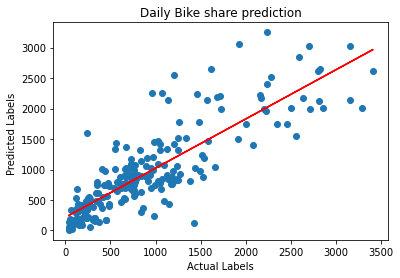

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels ")
plt.title("Daily Bike share prediction")

z=np.polyfit(y_test,pred,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color="red")
plt.show()

The tree model doesn't seem to have improved over the linear model.
So

Try an 

**Ensemble Algorithm**

Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a bagging) or by building a sequence of models that build on one another to improve predictive performance (referred to as boosting).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
RFR=RandomForestRegressor().fit(X_train,y_train)
print(RFR)

RandomForestRegressor()


In [36]:
predictions=RFR.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print("MSE: ",mse)
rmse=np.sqrt(mse)
print("RMSE: ",rmse)
r2=r2_score(y_test,predictions)
print("R2: ",r2)

MSE:  104856.60333227273
RMSE:  323.815693461995
R2:  0.8137383100881552


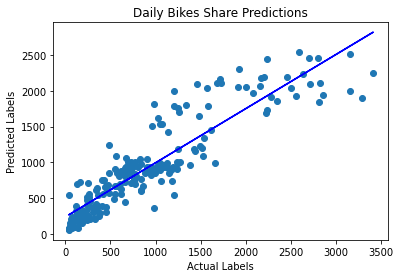

In [37]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Daily Bikes Share Predictions")

z=np.polyfit(y_test,predictions,1) 
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color="blue")
plt.show()

For good measure, let's also try a boosting ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor() 

MSE: 96782.3991415173
RMSE: 311.09869678530845
R2: 0.8280808967204701


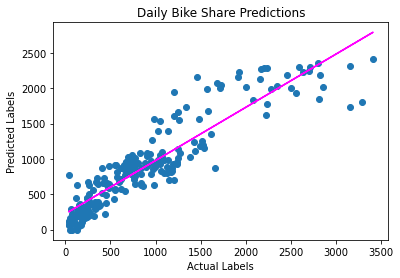

In [38]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()